__PCA的四个步骤:__标准化数据,构建协方差矩阵,得到特征值特征向量,排序得到排序靠前的特征向量

In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# 使用白酒数据集
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [34]:
# 对数据进行标准化
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
x, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [37]:
sc = StandardScaler()

In [38]:
x_train_std = sc.fit_transform(x_train)

In [39]:
x_test_std = sc.transform(x_test)

In [40]:
# 使用np.cov函数得到数据的协方差矩阵
cov_mat = np.cov(x_train_std.T)

In [41]:
# 使用np.linalg.eig函数得到特征值和特征向量
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals

array([4.8923083 , 2.46635032, 1.42809973, 1.01233462, 0.84906459,
       0.60181514, 0.52251546, 0.08414846, 0.33051429, 0.29595018,
       0.16831254, 0.21432212, 0.2399553 ])

In [42]:
# 求方差解释率
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.37329648, 0.56148574, 0.67045365, 0.74769754, 0.81248349,
       0.85840362, 0.89827298, 0.92349212, 0.94607393, 0.96438317,
       0.98073654, 0.99357924, 1.        ])

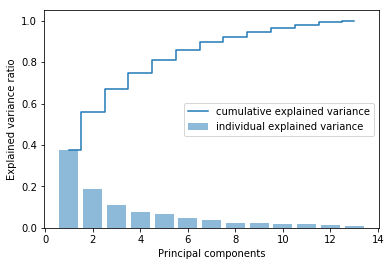

In [43]:
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
       label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [51]:
# 对特征进行排序
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)


In [49]:
# np.newaxis增加一个轴
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))

In [52]:
print('Matrix W: \n', w)

Matrix W: 
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [53]:
# 对样本进行映射
x_train_std[0].dot(w)

array([2.59891628, 0.00484089])

In [56]:
# 直接对原始数据进行映射
x_train_pca = x_train_std.dot(w)

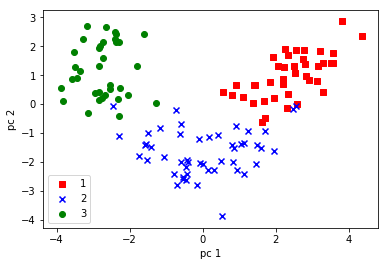

In [61]:
# 特征维度降到2维之后,我们就可以用散点图化出来
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_pca[y_train==l, 0],
               x_train_pca[y_train==l, 1],
               c=c, label=l, marker=m)
plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.legend(loc='lower left')
plt.show()

### scikit-learn中的PCA

In [62]:
from matplotlib.colors import ListedColormap

In [83]:
def plot_decision_regions(x, y, classifier, resolution=0.02):
    # 设置标记和颜色
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 绘制决策面
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 绘制分类样本
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [85]:
pca = PCA(n_components=2)

In [86]:
lr = LogisticRegression()

In [87]:
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

In [88]:
lr.fit(x_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

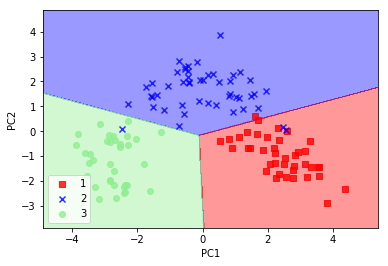

In [90]:
plot_decision_regions(x_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()